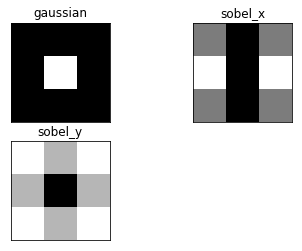

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Define a gaussian , sobel, laplacian edge filters
gaussian = (1/9)*np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])

sobel_x = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

sobel_y = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y]
filter_name = ['gaussian', 'sobel_x', 'sobel_y', 'laplacian']

# perform fourier transform on each filter and create a scaled,
#freq transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

#display 4 filters
for i in range(len(filters)):
    plt.subplot(2, 2, i+1), plt.imshow(frequency_tx[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
    
plt.show()

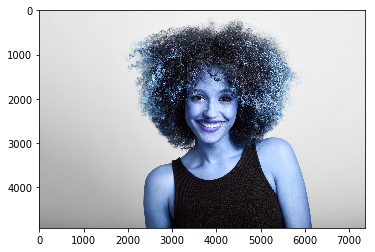

In [2]:
# load image and filter it using a kernal
image = cv2.imread('images/face2.jpg')
plt.imshow(image)

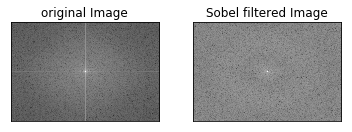

In [3]:
copy_image = np.copy(image)
copy_image = cv2.cvtColor(copy_image, cv2.COLOR_BGR2GRAY)
# filter the image
filter_image = cv2.filter2D(copy_image, -1, sobel_y)

# Apply fourier transform
filt_image = [copy_image, filter_image]
filt_name = ['original Image', 'Sobel filtered Image']
ff_filter = [np.fft.fft2(x) for x in filt_image]
ff_shift = [np.fft.fftshift(y) for y in ff_filter]
ff_freq = [np.log(np.abs(z) + 1) for z in ff_shift]

# displayy
for i in range(len(filt_image)):
    plt.subplot(2, 2, i+1), plt.imshow(ff_freq[i], cmap='gray')
    plt.title(filt_name[i]), plt.xticks([]), plt.yticks([])
